In [5]:
import numpy as np
import cbsyst as cb
import matplotlib.pyplot as plt

## K<sub>0</sub>

In [32]:
T = np.arange(-2, 30, 0.1)
Ks_35 = cb.calc_Ks(T=T, S=35)
Ks_30 = cb.calc_Ks(T=T, S=30)

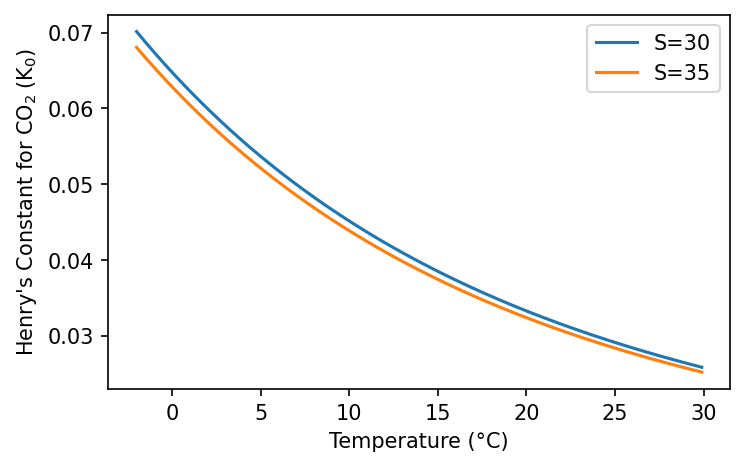

In [33]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(T, Ks_30.K0, label='S=30')
ax.plot(T, Ks_35.K0, label='S=35')

ax.legend()

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Henry's Constant for $CO_2~(K_0)$")

fig.savefig('figures/carbon_K0.png')

## Bjerrum Plot

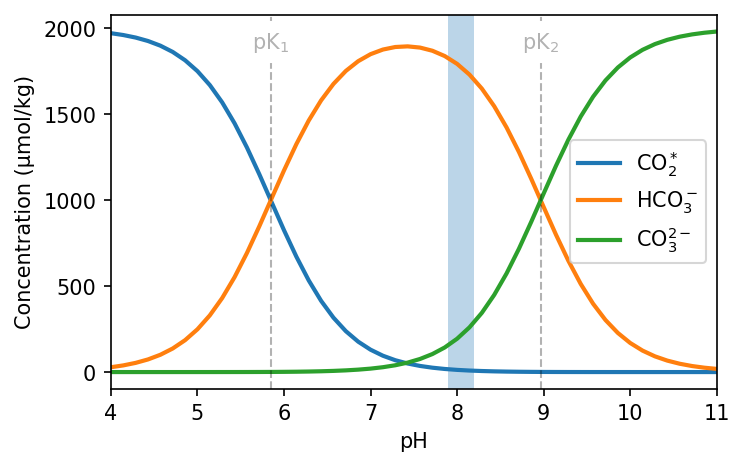

In [62]:
pH = np.linspace(4, 11)

sw = cb.Csys(pHtot=pH, DIC=2000)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(sw.pHtot, sw.CO2, label='$CO_2^*$', lw=2)
ax.plot(sw.pHtot, sw.HCO3, label='$HCO_3^-$', lw=2)
ax.plot(sw.pHtot, sw.CO3, label='$CO_3^{2-}$', lw=2)

ax.set_xlim(pH.min(), pH.max())

ax.axvspan(7.9, 8.2, color='C0', alpha=0.3, lw=0)

ax.legend()

ax.set_xlabel('pH')
ax.set_ylabel('Concentration (μmol/kg)')

ax.axvline(-np.log10(sw.Ks.K1), ls='--', color=(0,0,0,0.3), lw=1)
ax.text(-np.log10(sw.Ks.K1), 1850, '$pK_1$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)
ax.axvline(-np.log10(sw.Ks.K2), ls='--', color=(0,0,0,0.3), lw=1)
ax.text(-np.log10(sw.Ks.K2), 1850, '$pK_2$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)

fig.savefig('figures/carbon_bjerrum.png')

## K0K1K2

In [65]:
T = np.arange(-2, 30, 0.1)
Ks_35 = cb.calc_Ks(T=T, S=35)
Ks_30 = cb.calc_Ks(T=T, S=30)

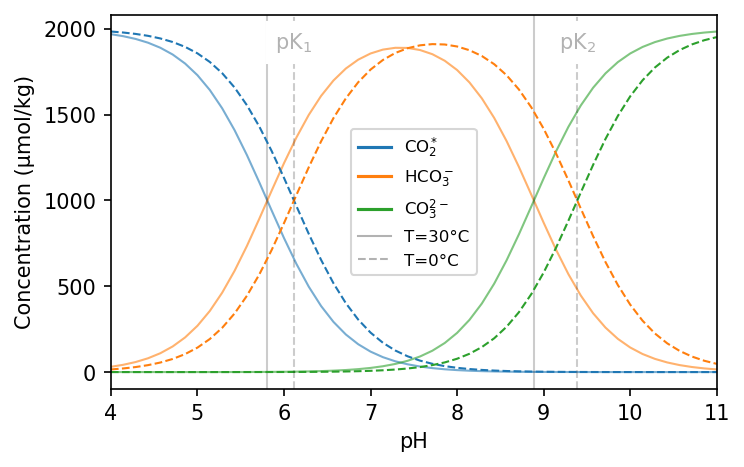

In [100]:
pH = np.linspace(4, 11)

sw_30 = cb.Csys(pHtot=pH, DIC=2000, T_in=30.)
sw_0 = cb.Csys(pHtot=pH, DIC=2000, T_in=0.)

fig, ax = plt.subplots(constrained_layout=True)

for sw, ls, lw, alpha in zip([sw_30, sw_0], ['-', '--'], [1,1], [.6, 1]):

    ax.plot(sw.pHtot, sw.CO2, color='C0', ls=ls, lw=lw, alpha=alpha)
    ax.plot(sw.pHtot, sw.HCO3, color='C1', ls=ls, lw=lw, alpha=alpha)
    ax.plot(sw.pHtot, sw.CO3, color='C2', ls=ls, lw=lw, alpha=alpha)

    
    ax.axvline(-np.log10(sw.Ks.K1), ls=ls, color=(0,0,0,0.2), lw=lw)
    ax.axvline(-np.log10(sw.Ks.K2), ls=ls, color=(0,0,0,0.2), lw=lw)

ax.text(-np.log10(sw.Ks.K1), 1850, '$pK_1$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)
ax.text(-np.log10(sw.Ks.K2), 1850, '$pK_2$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)

ax.plot([],[],label='$CO_2^*$',color='C0')
ax.plot([],[],label='$HCO_3^-$',color='C1')
ax.plot([],[],label='$CO_3^{2-}$',color='C2')
ax.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
ax.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')

ax.set_xlim(pH.min(), pH.max())
ax.set_xlabel('pH')
ax.set_ylabel('Concentration (μmol/kg)')


ax.legend(fontsize=8)

fig.savefig('figures/carbon_bjerrum_temp.png')

## Temp - pCO2

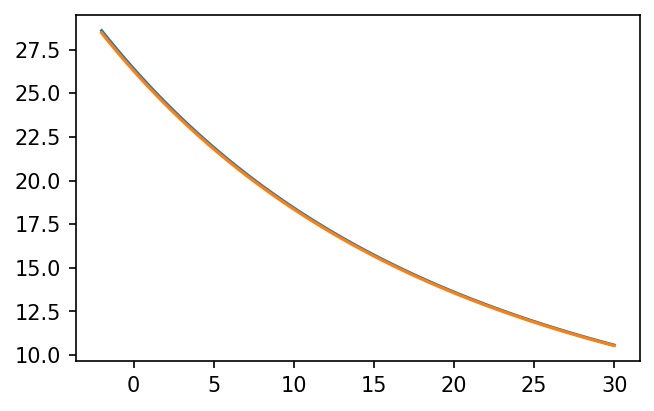

In [105]:
T = np.linspace(-2, 30, 100)

sw = cb.Csys(pCO2=420, TA=2300, T_in=T)

plt.plot(sw.T_in, 420 * sw.Ks.K0)
plt.plot(sw.T_in, sw.CO2)
